In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import zipfile

In [4]:

with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

FileNotFoundError: [Errno 2] No such file or directory: './archive.zip'

In [2]:
df_test = pd.read_csv('drugsComTest_raw.csv',parse_dates=['date'])
df_train = pd.read_csv('drugsComTrain_raw.csv',parse_dates=['date'])
df = pd.concat([df_train,df_test])
df_sorted = df.sort_values(by='date')

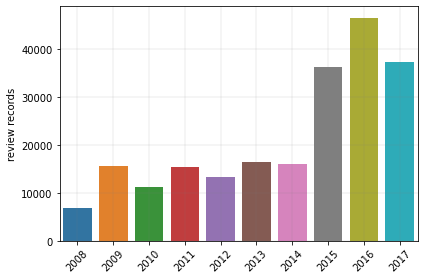

In [3]:
year_counts = df_sorted['date'].dt.year.value_counts()
year_counts.rename('review records',inplace=True)
year_labels = year_counts.index
sns.barplot(x = year_labels, y = year_counts)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linewidth=0.15,color='grey')

In [4]:
le_condition = LabelEncoder()
df_sorted['condition'] = le_condition.fit_transform(df_sorted['condition'])
top_ten_condition = df_sorted.nlargest(10,'condition')
# top_ten_condition_labels = le_condition.inverse_transform(top_ten_condition.values)
sns.set(font_scale=1.5, style='darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

In [5]:
count_max_condition = df_sorted['condition'].where(df_sorted['condition']==df_sorted['condition'].max()).count()
print(f'The number of conditions with maximum occurrances: {count_max_condition}')

The number of conditions with maximum occurrances: 1194


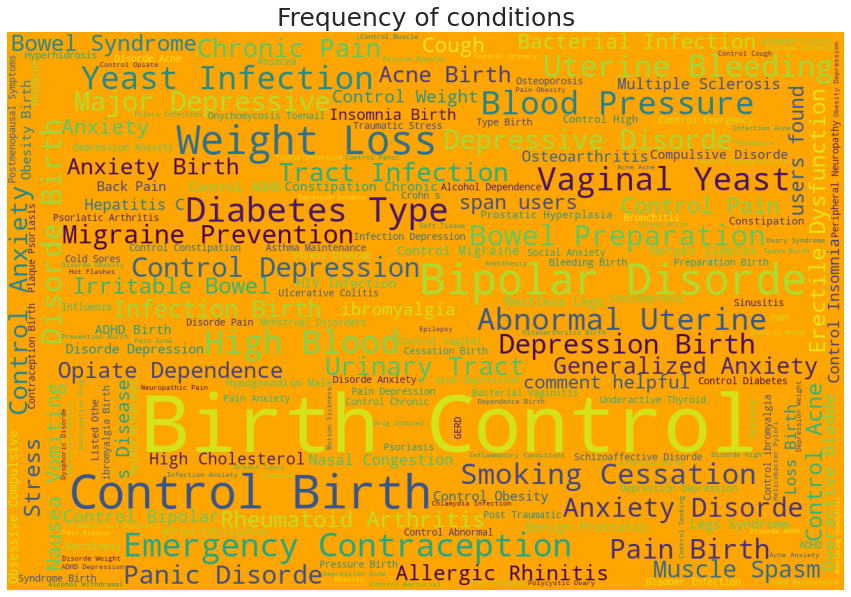

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re

stopwords = set(STOPWORDS)
condition_words = str(list(df['condition']))
filtered_words = re.sub('[^A-Za-z]+', ' ', condition_words)
wordcloud_condition = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of conditions',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_condition)
plt.show()

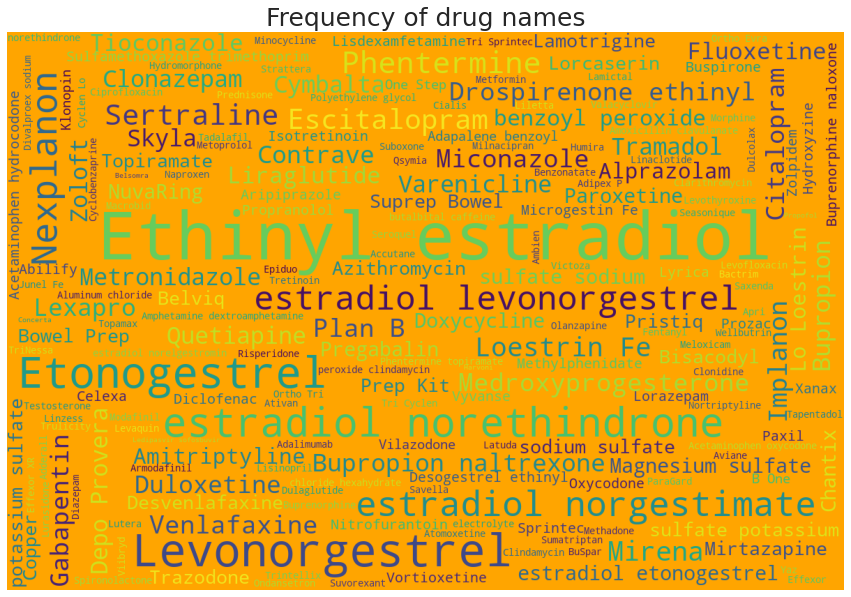

In [11]:
drug_words = str(list(df['drugName']))
filtered_drug_words = re.sub('[^A-Za-z]+', ' ', drug_words)
wordcloud_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_drug)
plt.show()

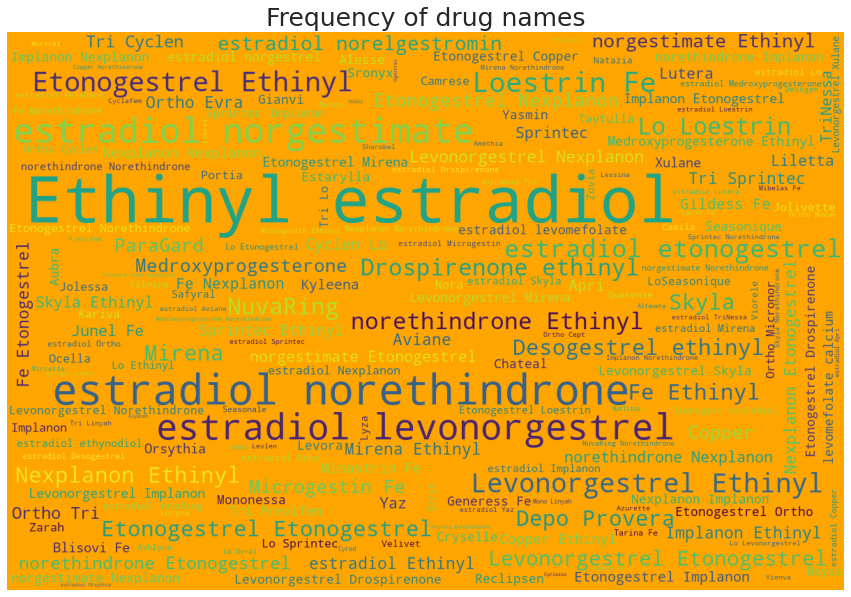

In [17]:
birth_control_drugs = df[df['condition']=='Birth Control'][['drugName','usefulCount']]
birth_drug_words = str(list(birth_control_drugs['drugName']))
filtered_birth_drug_words = re.sub('[^A-Za-z]+', ' ', birth_drug_words)
wordcloud_birth_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_birth_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_birth_drug)
plt.show()

/home/hadi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'usefulcount')

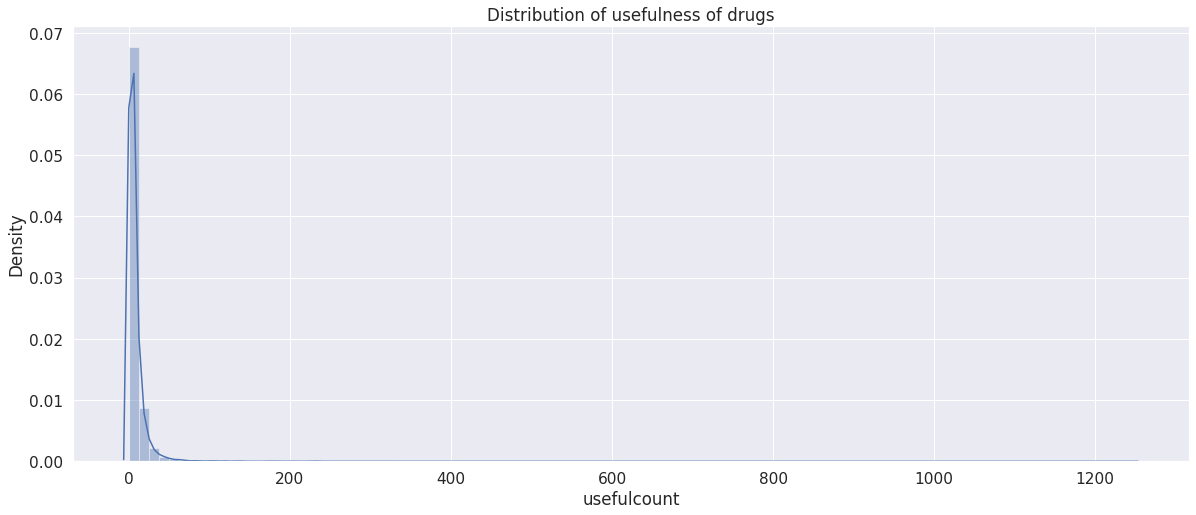

In [34]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots()
sns_1 = sns.distplot(birth_control_drugs['usefulCount'],bins = 100,ax=ax)
sns_1.set_title('Distribution of usefulness of drugs')
sns_1.set_xlabel("usefulcount")

In [25]:
birth_control_drugs.where(birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()).count()

drugName       2
usefulCount    2
dtype: int64

In [31]:
birth_control_drugs[birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()]['drugName']

4249             Mirena
21708    Levonorgestrel
Name: drugName, dtype: object

In [48]:
df_sorted['rating'][df_sorted['rating'] <5] = 0 
df_sorted['rating'][df_sorted['rating']>=5] = 1


/tmp/ipykernel_13003/3364040909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['rating'][df_sorted['rating'] <5] = 0
/tmp/ipykernel_13003/3364040909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['rating'][df_sorted['rating']>=5] = 1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [50]:

corpus = []
for i in range(len(df_sorted['review'])):
    review = re.sub('[^a-zA-Z]',' ', str(df_sorted['review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer() # Porter Stemmer object
    list_stopwords = stopwords.words('english')
    list_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(list_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /home/hadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 161297